In [50]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [51]:
# model to predit math scores

df = pd.read_csv("./StudentsPerformance.csv")

#drop non-math scores
df = df.drop('reading score', axis = 1)
df = df.drop('writing score', axis = 1)

# convert categories into machine readable format
df = pd.get_dummies(df)

# select values you wanna predict
labels = np.array(df["math score"])

# drop labels
df = df.drop('math score', axis = 1)

# save feature names for later use
df_list = list(df.columns)

# convert df to numpy array
df = np.array(df)

In [52]:
# split data into training and testing sets
train_df, test_df, train_labels, test_labels = train_test_split(df, labels, test_size = 0.25, random_state = 92)

print('Training Features Shape:', train_df.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_df.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (750, 17)
Training Labels Shape: (750,)
Testing Features Shape: (250, 17)
Testing Labels Shape: (250,)


In [53]:
# set baseline??

In [54]:
# define model with 1000 trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 29)

# Train on training data
rf.fit(train_df, train_labels)

RandomForestRegressor(n_estimators=1000, random_state=29)

In [55]:
# check accuracy
predictions = rf.predict(test_df)

# calculate absolute errors (+/- doesn't matter)
errors = abs(predictions - test_labels)
avg_error = np.mean(errors)
print('average absolute error:', avg_error, "points")
accuracy = 100 - avg_error
print('accuracy:', accuracy)

average absolute error: 10.564563349789925 points
accuracy: 89.43543665021008


In [56]:
# sample decision tree image --> file is saved in same directory

# import visualization tools
from sklearn.tree import export_graphviz
import pydot

# take a tree from the forest
tree = rf.estimators_[5]

# export to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = df_list, rounded = True, precision = 1)

# create graph using dot file
(graph, ) = pydot.graph_from_dot_file('tree.dot')

#write graph to png file
graph.write_png('tree.png')

In [57]:
# predict the math score of a sample student

# initialize test user data
# ss1 = sample student 1
ss = pd.read_csv("./ss.csv")
# turn into machine readable format
ss = pd.get_dummies(ss)
# convert to 2d array
ss_arr = ss.values

pred = rf.predict(ss_arr)
print(pred)
for x in range(len(pred)):
    print("Student " + str(x+1) + " math score: " + str(np.floor(pred[x])))

[46.79528146 69.17638689 57.31214935 76.1545654  59.93069762 72.83233949]
Student 1 math score: 46.0
Student 2 math score: 69.0
Student 3 math score: 57.0
Student 4 math score: 76.0
Student 5 math score: 59.0
Student 6 math score: 72.0


lunch pol: 0.10876565832737228
ethnicity: 0.055992199621189384
gender   : 0.051912844821423804
test prep: 0.050735751396567774
parent ed: 0.04953508213388754


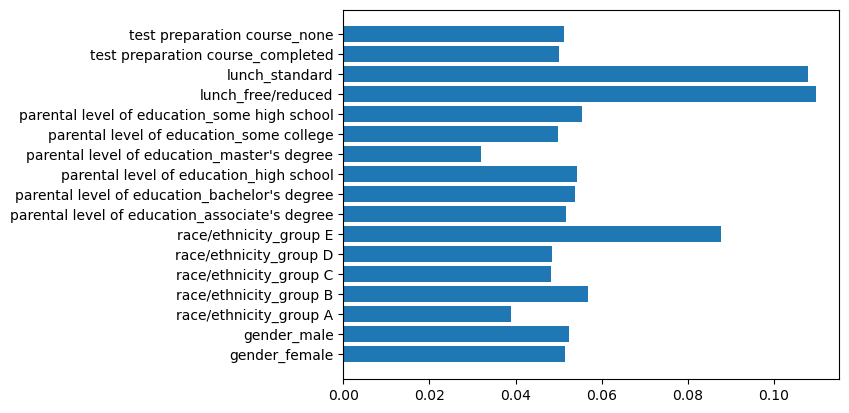

In [90]:
# show feature importance

# with rf built in
imps = rf.feature_importances_
plt.barh(df_list, imps)

print("lunch pol: " + str(np.mean(imps[13:15])))
print("ethnicity: " + str(np.mean(imps[2:7])))
print("gender   : " + str(np.mean(imps[0:2])))
print("test prep: " + str(np.mean(imps[15:17])))
print("parent ed: " + str(np.mean(imps[7:13])))
